<a href="https://colab.research.google.com/github/tlinhnguyen2308/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nhandienkhuonmat


In [2]:
import kagglehub
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")
face_path = os.path.join(path, "AI", "Nhận diện khuôn mặt")
emotion_path = os.path.join(path, "AI", "Cảm xúc")

image_size = 64

def load_data(folder_path):
    data = []
    labels = []
    label_names = sorted(os.listdir(folder_path))
    for i, label_name in enumerate(label_names):
        folder = os.path.join(folder_path, label_name)
        if not os.path.isdir(folder): continue
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0
                data.append(img)
                labels.append(i)
            except:
                continue
    data = np.array(data)
    labels = to_categorical(labels, num_classes=len(label_names))
    return data, labels, label_names

# Load dữ liệu
face_data, face_labels, face_classes = load_data(face_path)
emotion_data, emotion_labels, emotion_classes = load_data(emotion_path)

# Tách train/test
Xf_train, Xf_test, yf_train, yf_test = train_test_split(face_data, face_labels, test_size=0.2, random_state=42)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(emotion_data, emotion_labels, test_size=0.2, random_state=42)

In [7]:
def build_cnn_model(num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Mô hình khuôn mặt
face_model = build_cnn_model(len(face_classes))
face_model.fit(Xf_train, yf_train, epochs=10, validation_data=(Xf_test, yf_test), batch_size=32)

# Mô hình cảm xúc
emotion_model = build_cnn_model(len(emotion_classes))
emotion_model.fit(Xe_train, ye_train, epochs=10, validation_data=(Xe_test, ye_test), batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2500 - loss: 1.5865 - val_accuracy: 0.6667 - val_loss: 1.0423
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step - accuracy: 0.4583 - loss: 2.1061 - val_accuracy: 0.6667 - val_loss: 0.9621
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5000 - loss: 1.2135 - val_accuracy: 0.0000e+00 - val_loss: 1.4153
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3750 - loss: 1.2820 - val_accuracy: 0.1667 - val_loss: 1.3811
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6250 - loss: 1.2041 - val_accuracy: 0.5000 - val_loss: 1.2068
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8750 - loss: 1.0855 - val_accuracy: 0.6667 - val_loss: 1.0075
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7500 - loss: 0.9538 - val_accuracy: 0.6667 - val_loss: 0.8794
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6250 - loss: 0.8429 - val_accuracy: 0.6667 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


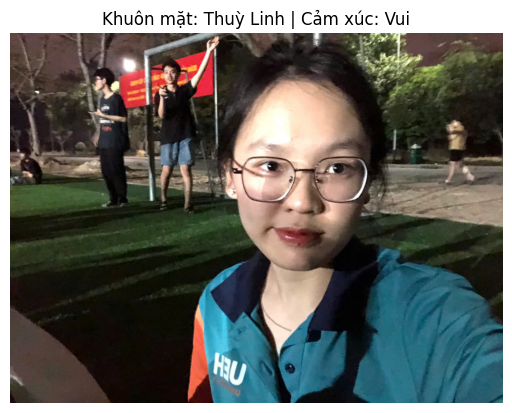

('Thuỳ Linh', 'Vui')

In [ ]:
def predict_face_and_emotion(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (image_size, image_size))
    img_norm = img_resized / 255.0
    input_img = np.expand_dims(img_norm, axis=0)

    # Dự đoán khuôn mặt
    face_pred = face_model.predict(input_img)
    face_label = face_classes[np.argmax(face_pred)]

    # Dự đoán cảm xúc
    emotion_pred = emotion_model.predict(input_img)
    emotion_label = emotion_classes[np.argmax(emotion_pred)]

    # Hiển thị ảnh và kết quả
    plt.imshow(img_rgb)
    plt.title(f"Khuôn mặt: {face_label} | Cảm xúc: {emotion_label}")
    plt.axis('off')
    plt.show()

    return face_label, emotion_label

# 🔍 Thực hiện dự đoán với ảnh
image_path = "/content/h1.jpg"
predict_face_and_emotion(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


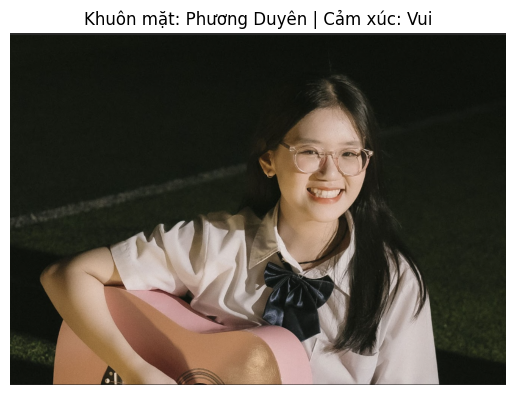

('Phương Duyên', 'Vui')

In [ ]:
def predict_face_and_emotion(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (image_size, image_size))
    img_norm = img_resized / 255.0
    input_img = np.expand_dims(img_norm, axis=0)

    # Dự đoán khuôn mặt
    face_pred = face_model.predict(input_img)
    face_label = face_classes[np.argmax(face_pred)]

    # Dự đoán cảm xúc
    emotion_pred = emotion_model.predict(input_img)
    emotion_label = emotion_classes[np.argmax(emotion_pred)]

    # Hiển thị ảnh và kết quả
    plt.imshow(img_rgb)
    plt.title(f"Khuôn mặt: {face_label} | Cảm xúc: {emotion_label}")
    plt.axis('off')
    plt.show()

    return face_label, emotion_label

# 🔍 Thực hiện dự đoán với ảnh
image_path = "/content/pduyn.png"
predict_face_and_emotion(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


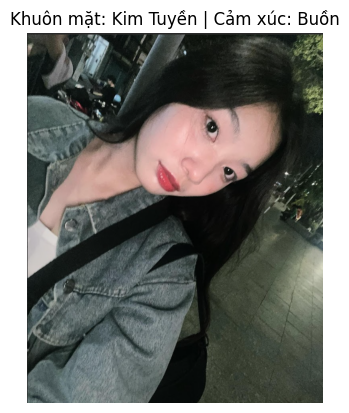

('Kim Tuyền', 'Buồn')

In [ ]:
def predict_face_and_emotion(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (image_size, image_size))
    img_norm = img_resized / 255.0
    input_img = np.expand_dims(img_norm, axis=0)

    # Dự đoán khuôn mặt
    face_pred = face_model.predict(input_img)
    face_label = face_classes[np.argmax(face_pred)]

    # Dự đoán cảm xúc
    emotion_pred = emotion_model.predict(input_img)
    emotion_label = emotion_classes[np.argmax(emotion_pred)]

    # Hiển thị ảnh và kết quả
    plt.imshow(img_rgb)
    plt.title(f"Khuôn mặt: {face_label} | Cảm xúc: {emotion_label}")
    plt.axis('off')
    plt.show()

    return face_label, emotion_label

# 🔍 Thực hiện dự đoán với ảnh
image_path = "/content/minn.png"
predict_face_and_emotion(image_path)